In [2]:
import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits import mplot3d # 3d plotting

from sklearn import linear_model

import pandas as pd

from sklearn.kernel_ridge import KernelRidge

from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge

import math
import random
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge

In [4]:
dfs = [] 
for i in range(1,8):
  print(i)
  df_t = pd.read_csv("/home/amat841/DATA/VTO/CALTRANS/streaming_data/processed_data_5_min/D7/Data/2021050{}_5min_caltrans_concat.csv".format(i))
  df_t[['FLOW','OCCUPANCY','SPEED','VMT','VHT','Q','TRAVEL_TIME','DELAY','NUM_SAMPLES','PCT_OBSERVED']].apply(pd.to_numeric, errors='coerce')
  dfs.append(df_t)
  
df_sampled = pd.concat(dfs)

# print(df_sampled)
df_sorted = df_sampled.sort_values(['VDS_ID', 'TIMESTAMP'], ascending=[True, True]).reset_index(drop=True)


1
2
3
4
5
6
7


/home/amat841/miniconda3/envs/FD_3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


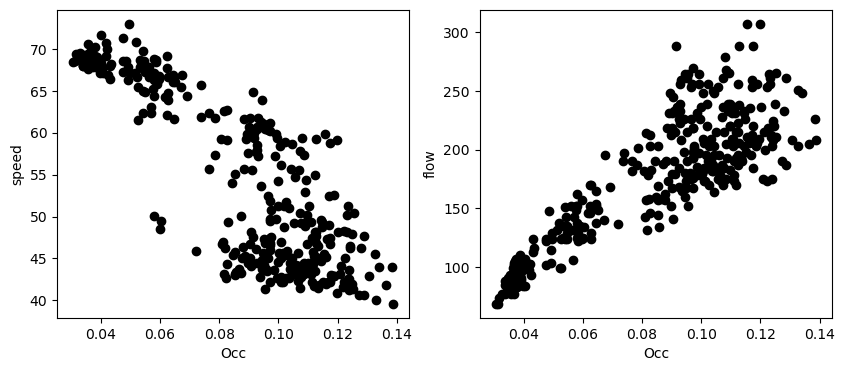

In [28]:

df_s1 = df_sorted[df_sorted['VDS_ID'] == 777245]
df_s1['TIMESTAMP'] = pd.to_datetime(df_s1['TIMESTAMP'])
df_s1 = df_s1.reset_index().set_index('TIMESTAMP')

df_s1_a = df_s1.between_time('06:00', '10:00')
# df_s1_a = df_s1.between_time('15:00', '21:00')
# print(df_s1_a)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(10,4)
fig.subplots_adjust(hspace=5)
ax1.scatter(df_s1_a['OCCUPANCY'], df_s1_a['SPEED'], c='k')
ax1.set(xlabel="Occ", ylabel="speed")
ax2.scatter(df_s1_a['OCCUPANCY'], df_s1_a['FLOW'], c='k')
ax2.set(xlabel="Occ", ylabel="flow")

plt.show()

In [19]:

rng = np.random.RandomState() 

list_x = np.array(df_s1_a['OCCUPANCY'].to_list()).reshape(-1,1)
max_occ = np.max(list_x)
min_occ = np.min(list_x)
x_len = len(list_x)
print(max_occ)
print(min_occ)
print(x_len)

list_y = np.array(df_s1_a['FLOW'].to_list()).reshape(-1,1)

# Add noise to targets
# list_y[::5] += 3 * (0.5 - rng.rand(list_x.shape[0]/5))

train_size =(int) (0.7 * x_len)

# define model 
# model = Ridge()

# model evaluation.. 
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
#                   param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
#                               "gamma": np.logspace(-2, 2, 5)})

# kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.9), cv=5,
#                   param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
#                               "gamma": np.logspace(-7, 4, 10)})

# kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.9), cv=cv,
kr = GridSearchCV(KernelRidge(kernel='poly', gamma=0.9), cv=cv,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-7, 4, 10)})
# kr.cv_results_
kr.fit(list_x[:train_size], list_y[:train_size])
print(sorted(kr.cv_results_.keys()))



0.1388
0.0306
342
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_alpha', 'param_gamma', 'params', 'rank_test_score', 'split0_test_score', 'split10_test_score', 'split11_test_score', 'split12_test_score', 'split13_test_score', 'split14_test_score', 'split15_test_score', 'split16_test_score', 'split17_test_score', 'split18_test_score', 'split19_test_score', 'split1_test_score', 'split20_test_score', 'split21_test_score', 'split22_test_score', 'split23_test_score', 'split24_test_score', 'split25_test_score', 'split26_test_score', 'split27_test_score', 'split28_test_score', 'split29_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']


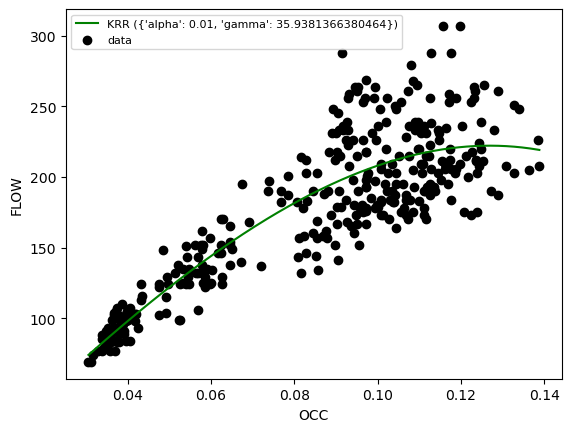

In [22]:
X_plot = np.linspace(min_occ,max_occ,x_len)[:, None]
y_kr = kr.predict(X_plot)
plt.scatter(list_x[:x_len], list_y[:x_len], c='k', label='data')
# plt.hold('on')
plt.plot(X_plot, y_kr, c='g',label='KRR (%s)' %kr.best_params_)
plt.xlabel('OCC')
plt.ylabel('FLOW')
plt.legend(loc="best", scatterpoints=1, prop={"size": 8})
plt.show()


In [24]:
list_x = np.array(df_s1_a['SPEED'].to_list()).reshape(-1,1)
list_y = np.array(df_s1_a['FLOW'].to_list()).reshape(-1,1)

max_spd = np.max(list_x)
min_spd = np.min(list_x)
x_len = len(list_x)
print(max_spd)
print(min_spd)
print(x_len)

train_size = (int)(0.7 * x_len)

# define model 
model = Ridge()

# model evaluation.. 
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
#                   param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
#                               "gamma": np.logspace(-2, 2, 5)})

# kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.9), cv=5,
#                   param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
#                               "gamma": np.logspace(-7, 4, 10)})

# kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.9), cv=cv,
kr = GridSearchCV(KernelRidge(kernel='poly', gamma=0.9), cv=cv,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-7, 4, 10)})
kr.fit(list_x[:train_size], list_y[:train_size])


73.0
39.6
342


/home/amat841/miniconda3/envs/FD_3.7/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/amat841/miniconda3/envs/FD_3.7/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/amat841/miniconda3/envs/FD_3.7/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/amat841/miniconda3/envs/FD_3.7/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matr

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=KernelRidge(gamma=0.9, kernel='poly'),
             param_grid={'alpha': [1.0, 0.1, 0.01, 0.001],
                         'gamma': array([1.00000000e-07, 1.66810054e-06, 2.78255940e-05, 4.64158883e-04,
       7.74263683e-03, 1.29154967e-01, 2.15443469e+00, 3.59381366e+01,
       5.99484250e+02, 1.00000000e+04])})

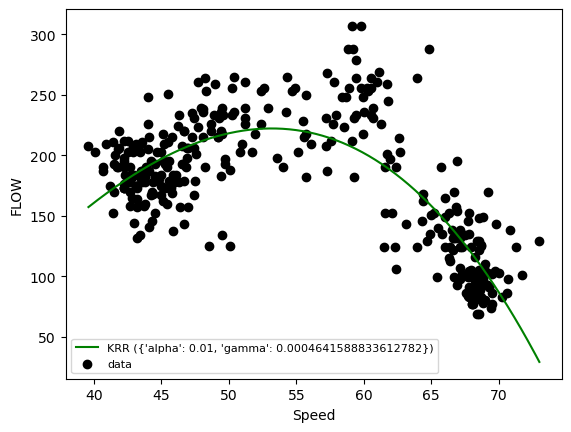

In [26]:

X_plot = np.linspace(min_spd,max_spd,x_len)[:, None]
y_kr = kr.predict(X_plot)

plt.scatter(list_x[:x_len], list_y[:x_len], c='k', label='data')
# plt.hold('on')
plt.plot(X_plot, y_kr, c='g',
         label='KRR (%s)' %kr.best_params_)
plt.xlabel('Speed')
plt.ylabel('FLOW')
plt.legend(loc="best", scatterpoints=1, prop={"size": 8})
plt.show()